<p style="background-color: purple; font-family: newtimeroman; font-size: 250%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b> Credit Score Project</b>

<span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span>

</p>

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- *ID*: The unique identifier for each record in the dataset.
- *Customer_ID*: The unique identifier for each customer.
- *Month*: The month to which the record corresponds.
- *Name*: The name of the customer.
- *Age*: The age of the customer. Note: There are some data quality issues, such as anomalous values.
- *SSN*: The Social Security Number of the customer.
- *Occupation*: The occupation of the customer.
- *Annual_Income*: The annual income of the customer in USD.
- *Monthly_Inhand_Salary*: The monthly take-home (net) salary of the customer in USD.
- *Num_Bank_Accounts*: The number of bank accounts held by the customer.
- *Num_Credit_Card*: The number of credit cards held by the customer.
- *Interest_Rate*: The average interest rate (%) applicable to the customer's loans or credit cards.
- *Num_of_Loan*: The number of loans (including mortgages, personal loans, auto loans, etc.) that the customer has.
- *Type_of_Loan*: The types of loans taken by the customer, listed in a single cell and separated by semicolons.
- *Delay_from_due_date*: The average delay (in days) from the due date for payments across all the customer's loans and credit cards.
- *Num_of_Delayed_Payment*: The total number of times the customer has delayed payments across all loans and credit cards.
- *Changed_Credit_Limit*: Any recent changes to the customer's credit limit (requires further context).
- *Num_Credit_Inquiries*: The number of inquiries made on the customer's credit report, typically indicating applications for new credit.
- *Credit_Mix*: The diversity of credit types held by the customer, affecting credit scores. Specific categories (e.g., "Good", "Bad") need further definition.
- *Outstanding_Debt*: The total outstanding debt the customer has across all loans and credit lines.
- *Credit_Utilization_Ratio*: The ratio of total debt to total available credit, a key indicator of credit risk.
- *Credit_History_Age*: The age of the customer's credit history.
- *Payment_of_Min_Amount*: Indicates whether the customer typically pays at least the minimum amount due on their debts.
- *Total_EMI_per_month*: The total monthly payment the customer makes towards all their loans as EMI (Equated Monthly Installment).
- *Amount_invested_monthly*: The amount of money the customer invests monthly (could be in savings accounts, stocks, bonds, etc.).
- *Payment_Behaviour*: Characterizes the customer's payment behavior in terms of expenditure and value of transactions.
- *Monthly_Balance*: The average monthly balance maintained by the customer in their accounts.
- *Credit_Score*: The credit score of the customer, a summary measure of their creditworthiness.

### Installing Tensorflow

In [ ]:
#pip install keras

In [ ]:
#!pip install tensorflow

## Import Libraries

In [2]:
import tensorflow as tf

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Read Data Sets

In [6]:
df = pd.read_csv("/content/drive/MyDrive/DL_Credit_Score/train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [101]:
df0 = pd.read_csv("/content/drive/MyDrive/DL_Credit_Score/test.csv")
df0.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.987,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## EDA

In [8]:
df = clean_columns(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  object 
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  object 
 8   monthly_inhand_salary     84998 non-null   float64
 9   num_bank_accounts         100000 non-null  int64  
 10  num_credit_card           100000 non-null  int64  
 11  interest_rate             100000 non-null  int64  
 12  num_of_loan               100000 non-null  object 
 13  type_of_loan              88592 non-null   ob

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_inhand_salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
num_bank_accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
num_credit_card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
interest_rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
num_credit_inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
credit_utilization_ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
total_emi_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


In [11]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
id,0,0.000
customer_id,0,0.000
month,0,0.000
name,9985,9.980
age,0,0.000
ssn,0,0.000
occupation,0,0.000
annual_income,0,0.000
monthly_inhand_salary,15002,15.000
num_bank_accounts,0,0.000


### Drop Unnecessary Columns

In [12]:
df = df.drop(columns=['id', 'age', 'customer_id', 'name', 'ssn','type_of_loan'], axis = 1)

### Monthly Inhand Salary

In [13]:
df['monthly_inhand_salary'].fillna(df['monthly_inhand_salary'].median(), inplace=True)

### Delay from Due Date

In [14]:
df['delay_from_due_date'] = df['delay_from_due_date'].astype(str).str.replace('-', '')
df['delay_from_due_date'] = pd.to_numeric(df['delay_from_due_date'], errors='coerce')

### Num of Delayed Payment

In [15]:
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].str.replace('-', '').str.replace('_', '')
df['num_of_delayed_payment'] = pd.to_numeric(df['num_of_delayed_payment'], errors='coerce')

df['num_of_delayed_payment'].fillna(df['num_of_delayed_payment'].median(), inplace=True)

In [16]:
df['num_of_delayed_payment'].value_counts()

num_of_delayed_payment
14.000      11195
19.000       5481
17.000       5412
16.000       5312
10.000       5309
            ...  
848.000         1
4134.000        1
1530.000        1
1502.000        1
2047.000        1
Name: count, Length: 708, dtype: int64

### Num Credit Inquiries

In [17]:
df['num_credit_inquiries'].fillna(df['num_credit_inquiries'].median(), inplace=True)

### Payment of Min Amount

In [18]:
df['payment_of_min_amount'].replace({'NM': 'No'}, inplace=True)
df = pd.get_dummies(df, columns=['credit_mix', 'payment_of_min_amount'])

### Credit History Age Months

In [19]:
def years_months_to_months(period):
    if pd.isnull(period):
        return period

    parts = period.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

df['credit_history_age_months'] = df['credit_history_age'].apply(years_months_to_months)

df[['credit_history_age', 'credit_history_age_months']].head()

,credit_history_age,credit_history_age_months
0,22 Years and 1 Months,265.000
1,NaN,NaN
2,22 Years and 3 Months,267.000
3,22 Years and 4 Months,268.000
4,22 Years and 5 Months,269.000


In [20]:
df['credit_history_age_months'].fillna(df['credit_history_age_months'].median(), inplace=True)

In [21]:
df = df.drop('credit_history_age', axis = 1)

### Amount Invested Monthly

In [22]:
df['amount_invested_monthly'] = pd.to_numeric(df['amount_invested_monthly'], errors='coerce')

median_amount_invested_monthly = df['amount_invested_monthly'].median()

df['amount_invested_monthly'].fillna(median_amount_invested_monthly, inplace=True)

### Monthly Balance

In [23]:
df['monthly_balance'] = pd.to_numeric(df['monthly_balance'], errors='coerce')

median_monthly_balance = df['monthly_balance'].median()

df['monthly_balance'].fillna(median_monthly_balance, inplace=True)


### Num of Loan

In [24]:
df['num_of_loan'] = pd.to_numeric(df['num_of_loan'].str.replace('_', '').replace('', np.nan),
                                  errors='coerce').fillna(0).astype(int)

df.loc[df['num_of_loan'] < 0, 'num_of_loan'] = -1

### Change Credit Limit

In [25]:
df['changed_credit_limit'] = pd.to_numeric(df['changed_credit_limit'].str.replace('_', ''), errors='coerce')

In [26]:
df['changed_credit_limit'] = df['changed_credit_limit'].median()

df['changed_credit_limit'].fillna(df['changed_credit_limit'], inplace=True)

### Payment Behaviour

In [27]:
df['payment_behaviour'] = df['payment_behaviour'].replace('!@9#%8', np.nan)

### Annual Income

In [28]:
df['annual_income'] = pd.to_numeric(df['annual_income'].str.replace('_', ''), errors='coerce')

### Outstanding Debt

In [29]:
df['outstanding_debt'] = df['outstanding_debt'].str.replace('-', '').str.replace('_', '')
df['outstanding_debt'] = pd.to_numeric(df['outstanding_debt'], errors='coerce')

### NULL Values Check

In [30]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
month,0,0.000
occupation,0,0.000
annual_income,0,0.000
monthly_inhand_salary,0,0.000
num_bank_accounts,0,0.000
num_credit_card,0,0.000
interest_rate,0,0.000
num_of_loan,0,0.000
delay_from_due_date,0,0.000
num_of_delayed_payment,0,0.000


## Data Visualization

In [31]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)

    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")

    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: month
Number of Unique Values: 8
Unique Values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Column: occupation
Number of Unique Values: 16
First 10 Unique Values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist']
... and 6 more unique values

Column: annual_income
Number of Unique Values: 13487
First 10 Unique Values: [   19114.12    34847.84   143162.64    30689.89    35547.71    73928.46
   131313.4  10909427.      34081.38   114838.41]
... and 13477 more unique values

Column: monthly_inhand_salary
Number of Unique Values: 13235
First 10 Unique Values: [ 1824.84333333  3093.745       3037.98666667 12187.22
  2612.49083333  2853.30916667  5988.705      11242.78333333
 10469.20775939  2611.115     ]
... and 13225 more unique values

Column: num_bank_accounts
Number of Unique Values: 943
First 10 Unique Values: [3 2 1 7 4 0 8 5 6 9]
... and 933 more unique values

Column: num_credit_c

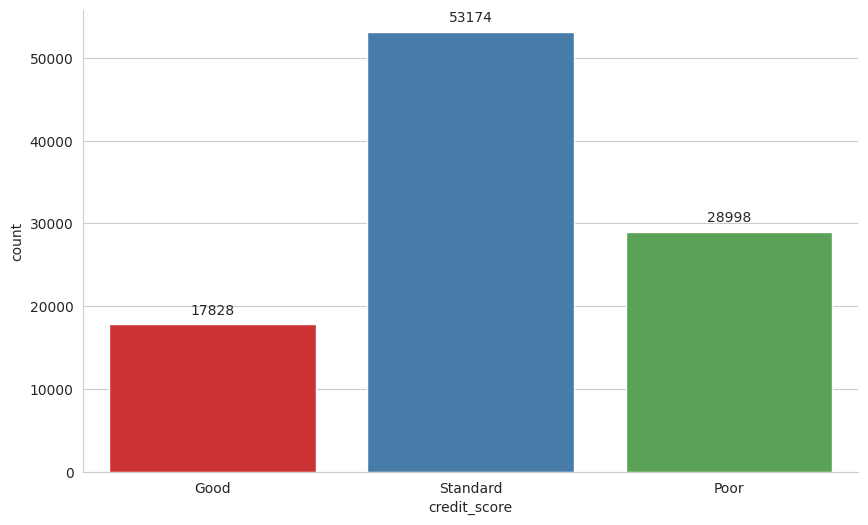

In [32]:
ax = sns.countplot(x=df["credit_score"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

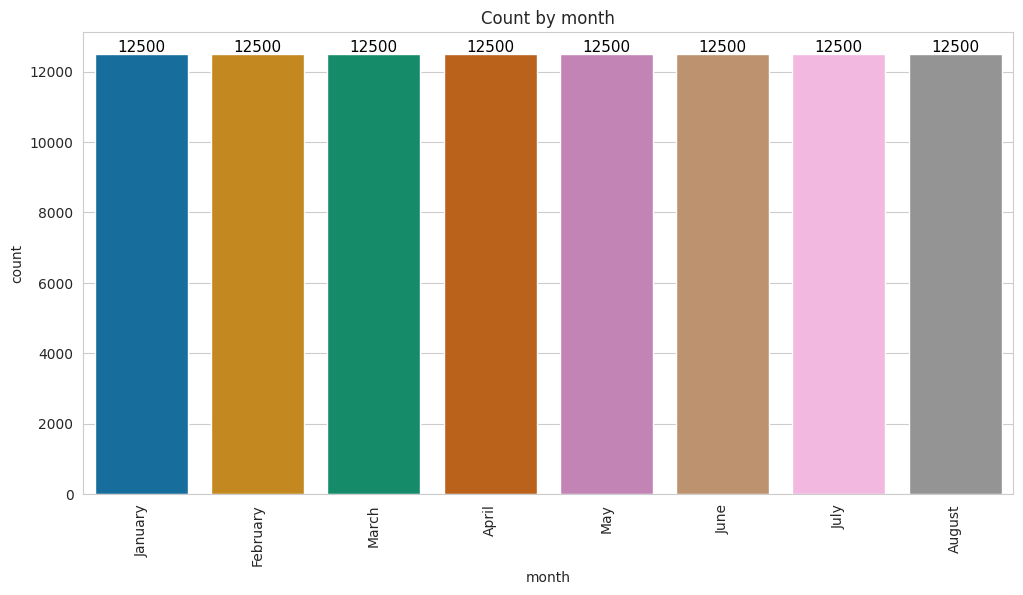

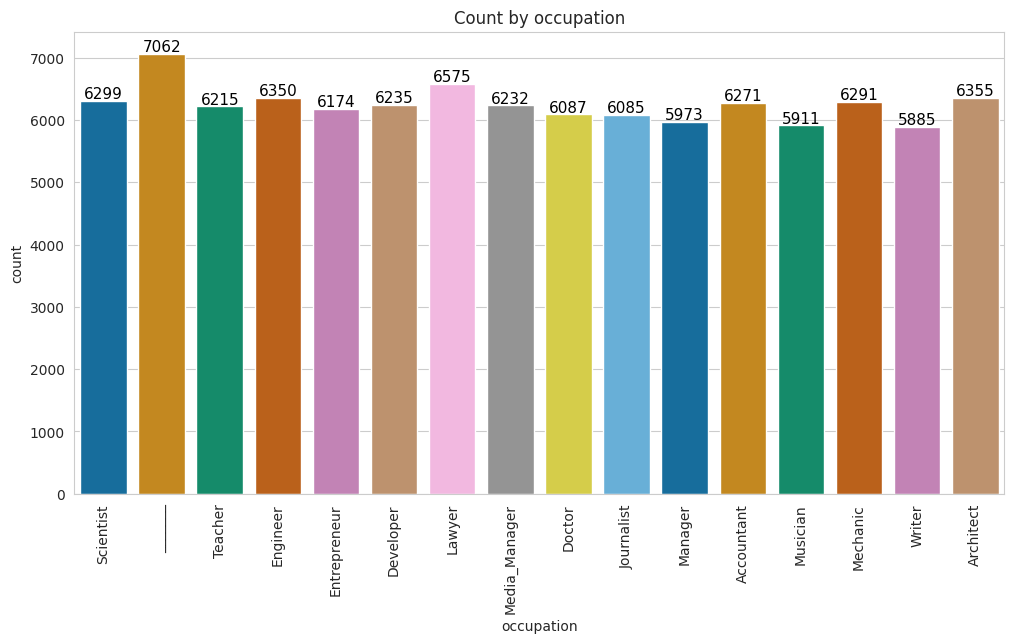

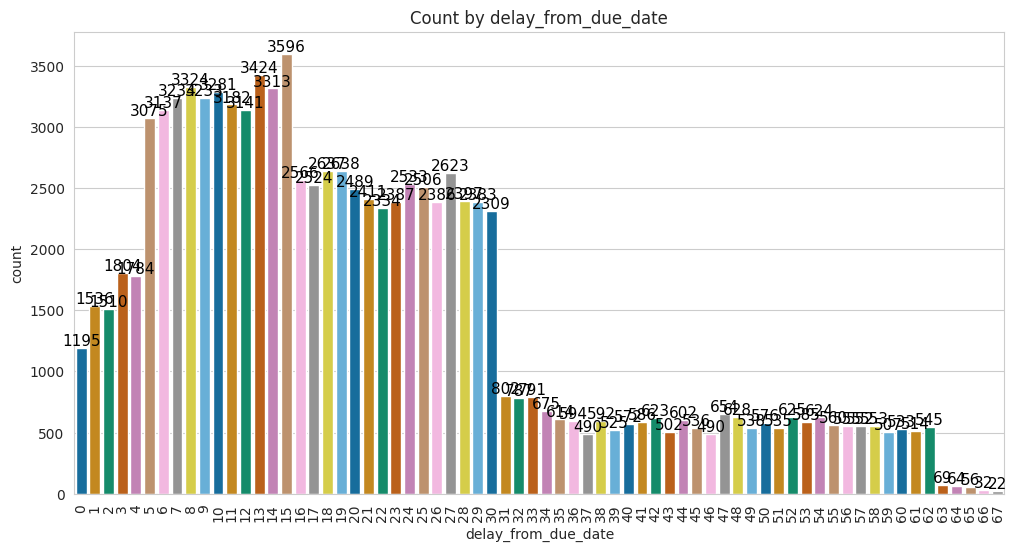

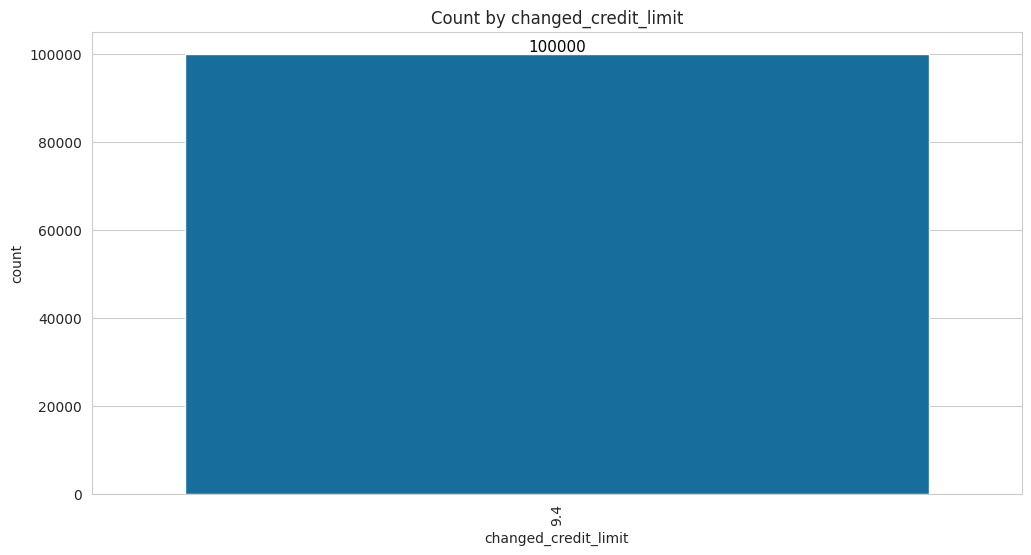

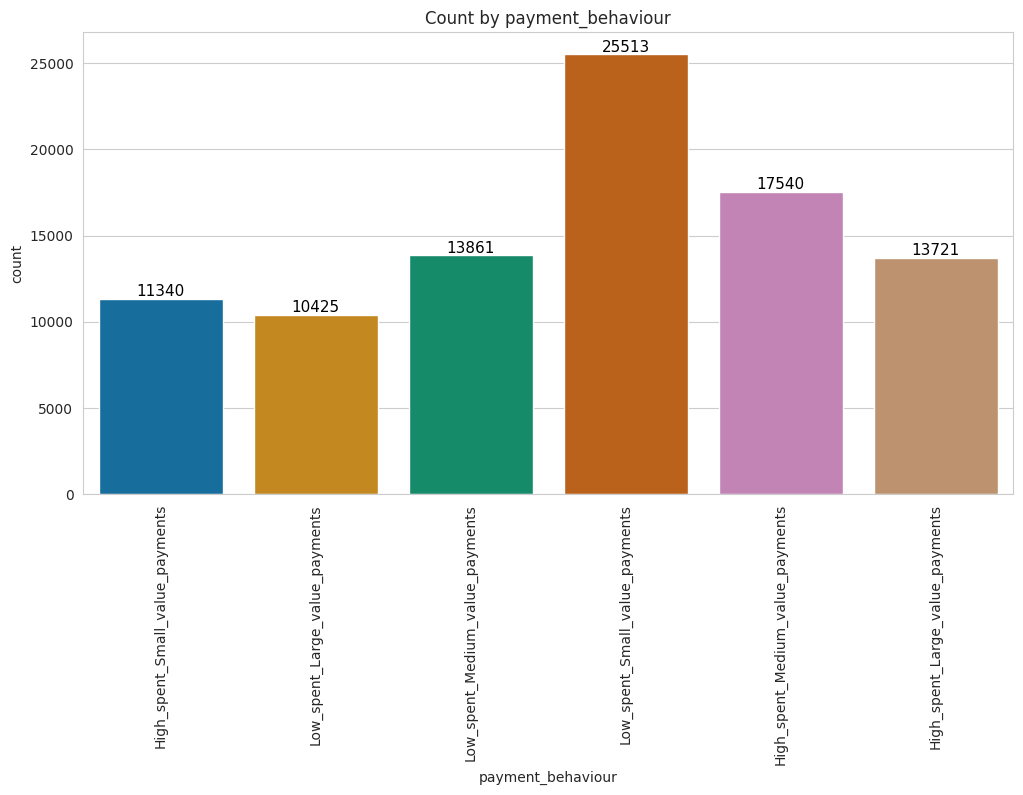

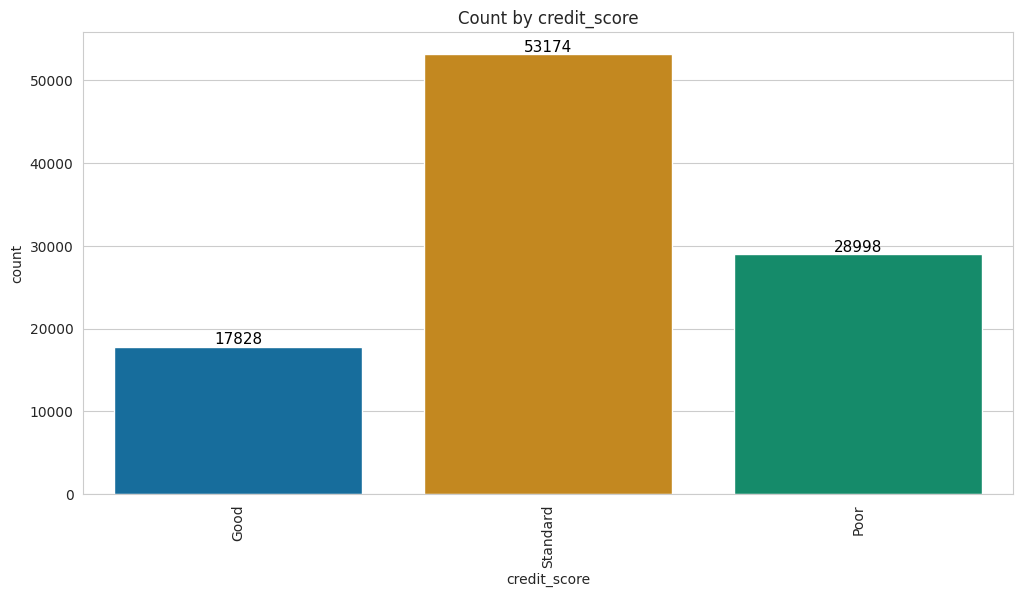

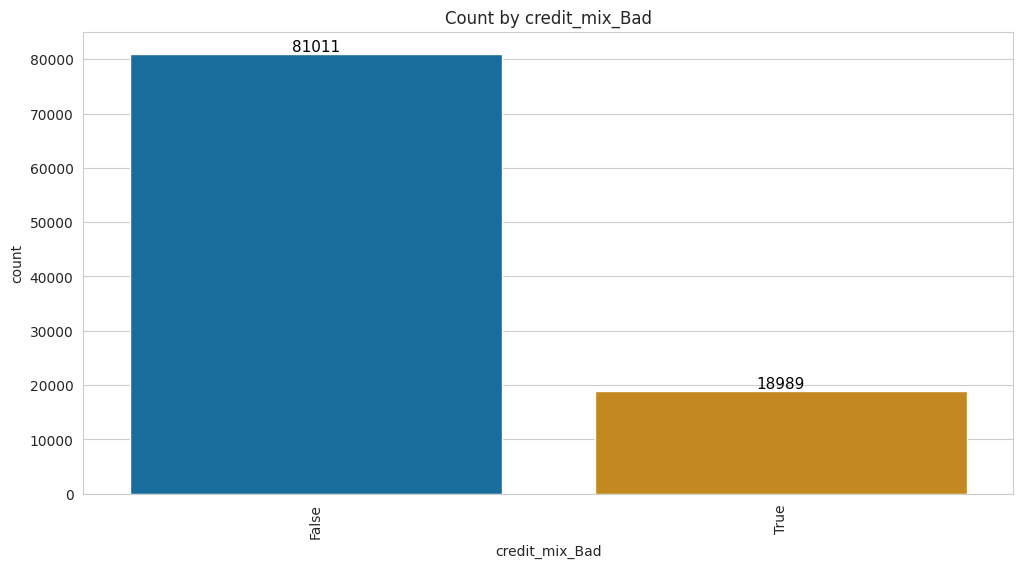

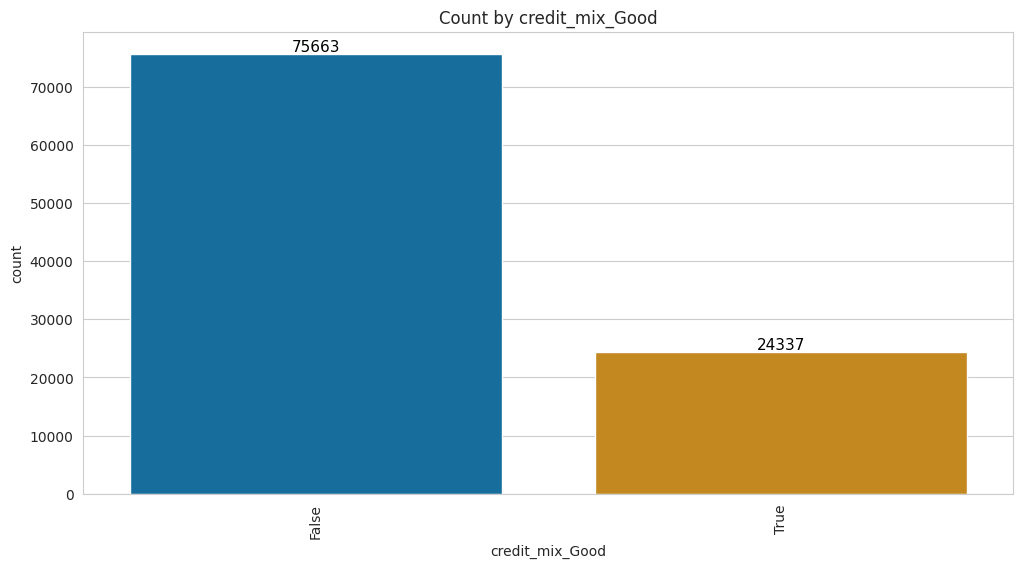

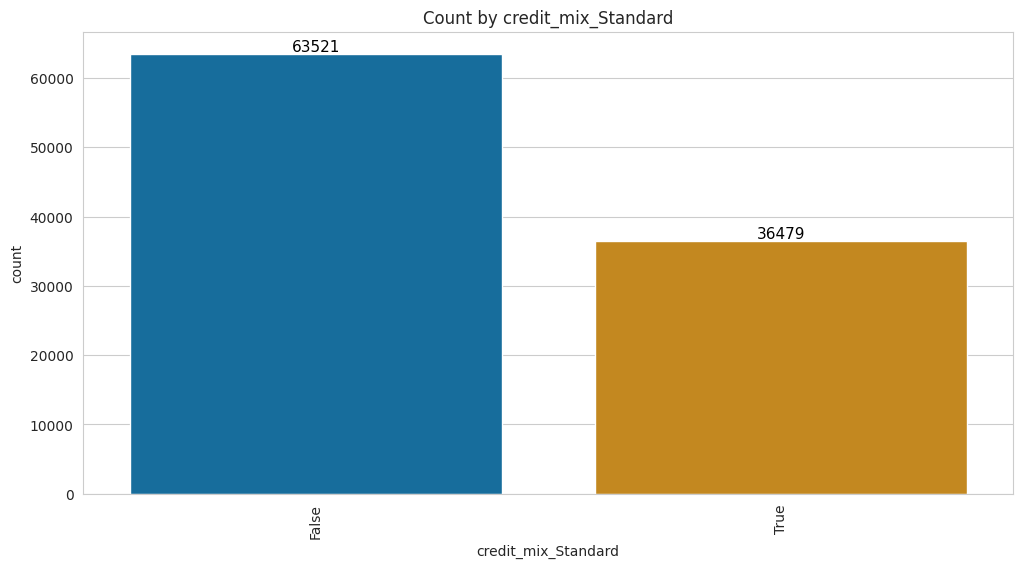

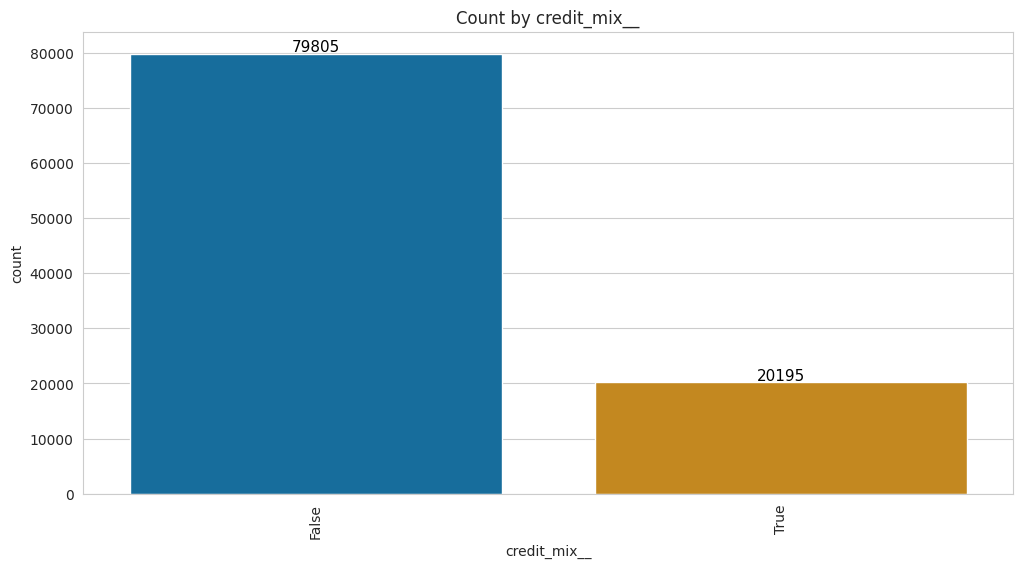

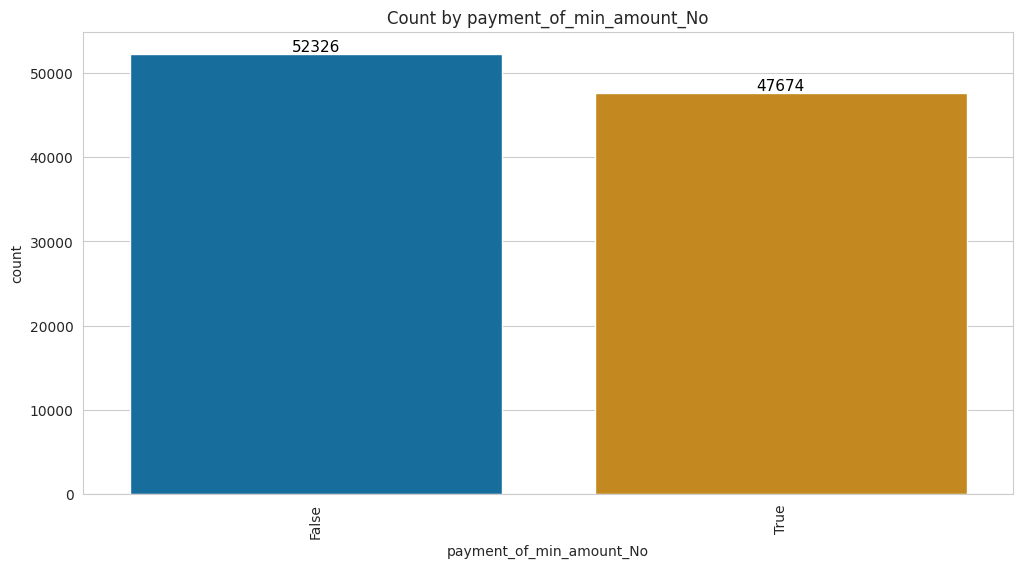

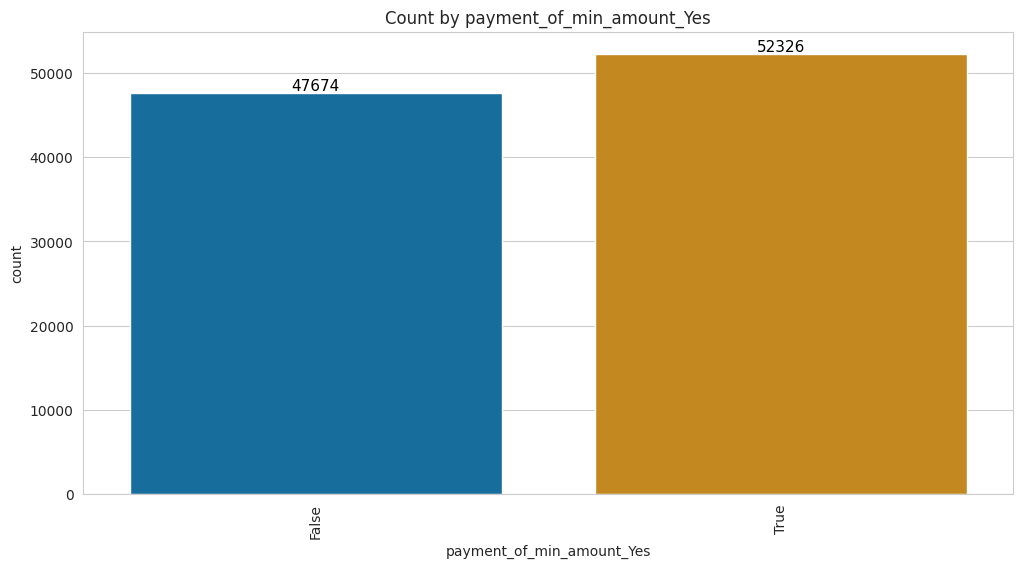

In [33]:
max_unique_values = 100

for col in df.columns:
    if col in df and df[col].nunique() <= max_unique_values:
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x=col, data= df, palette="colorblind")

        plt.title(f"Count by {col}")
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

        # Adding counts above each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.show()

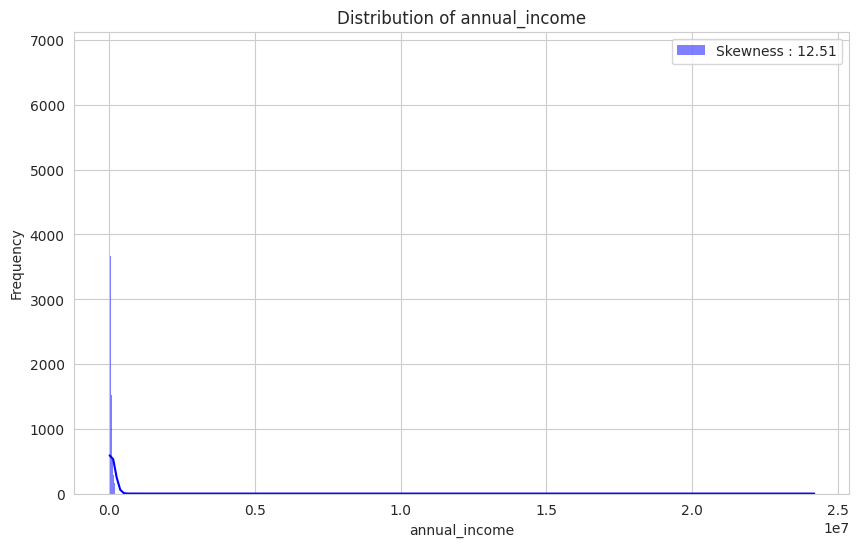

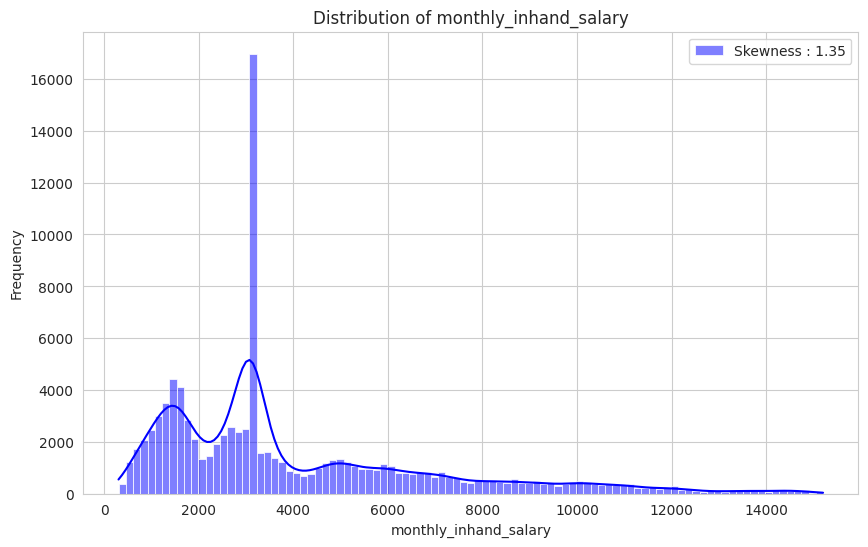

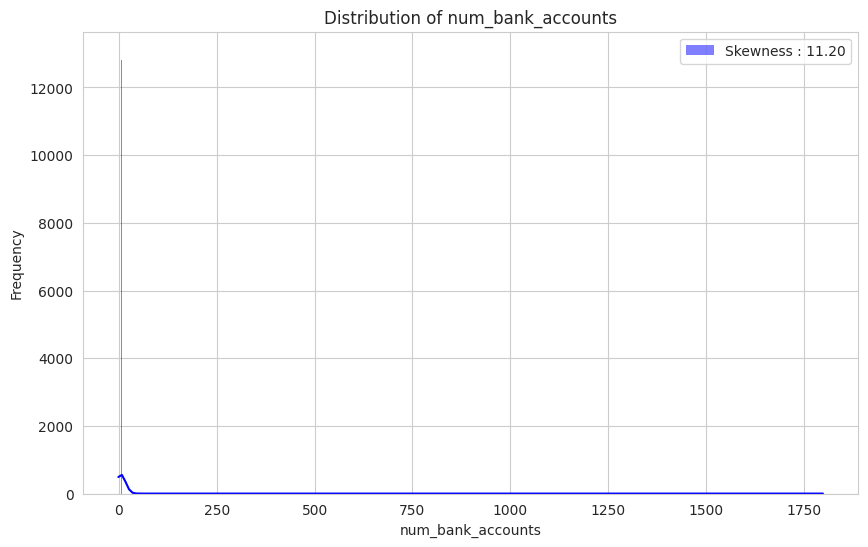

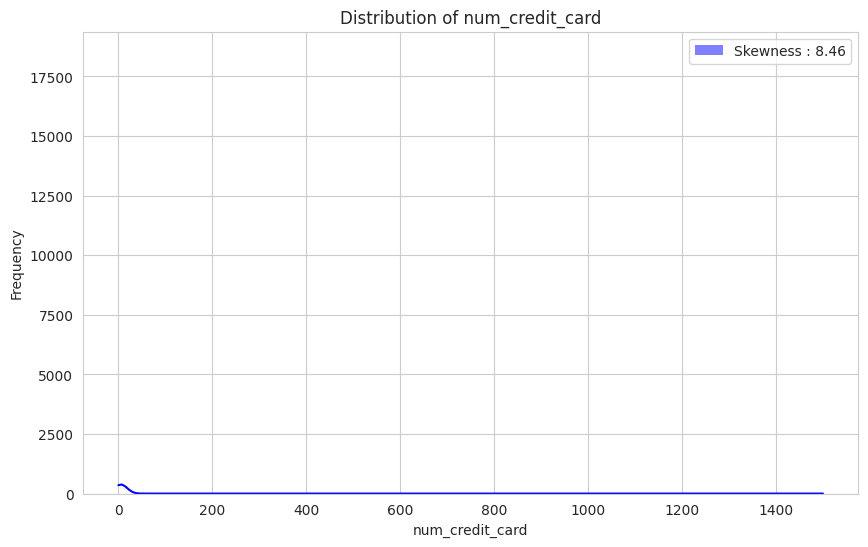

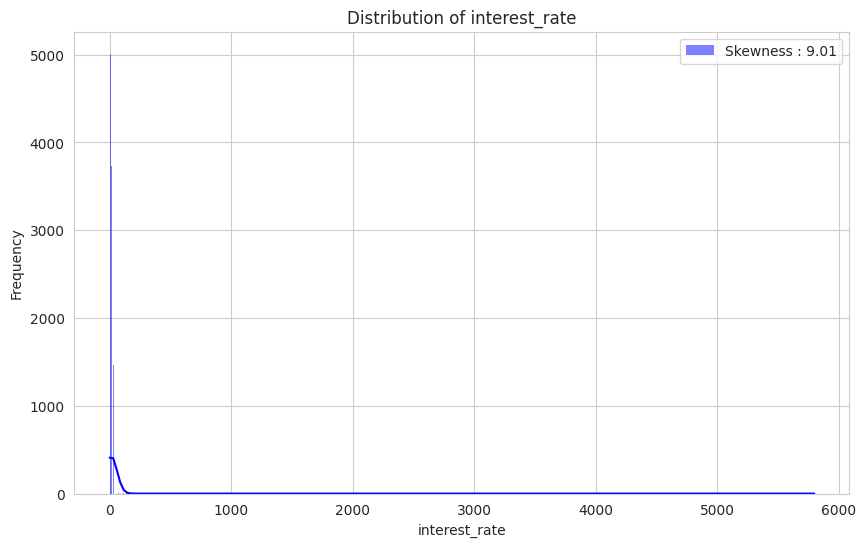

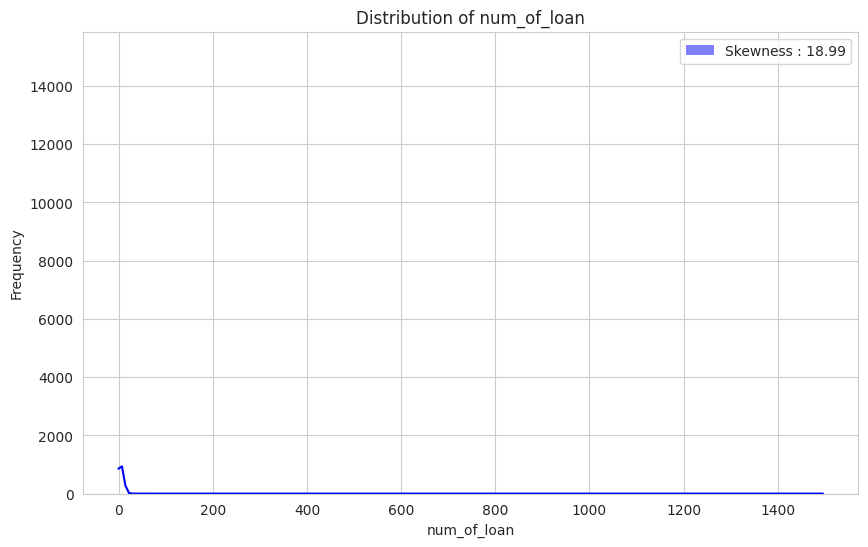

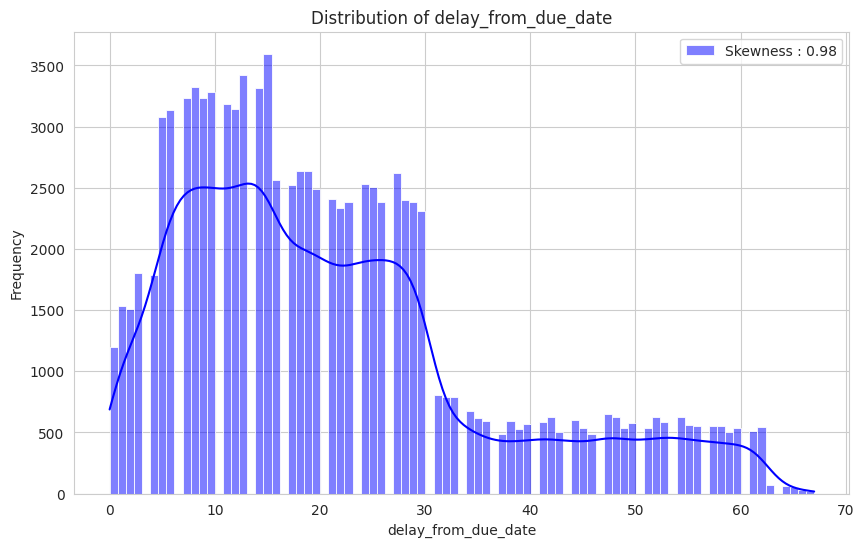

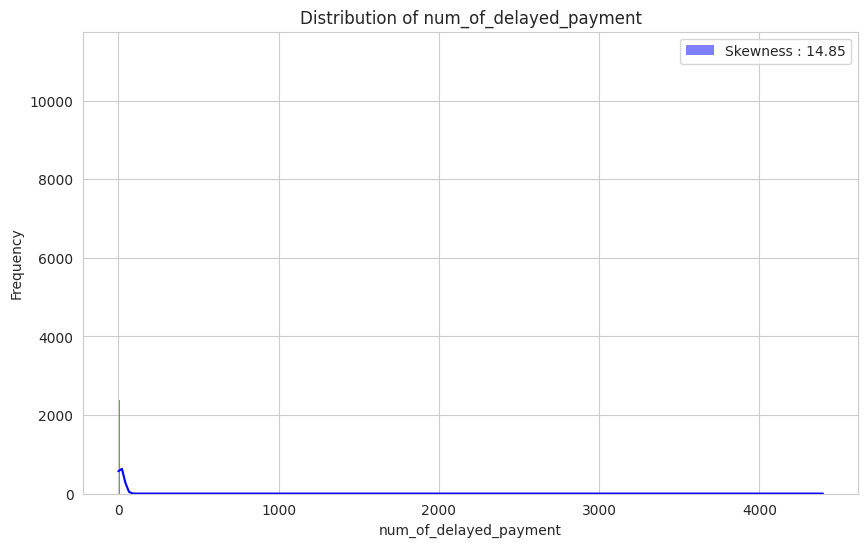

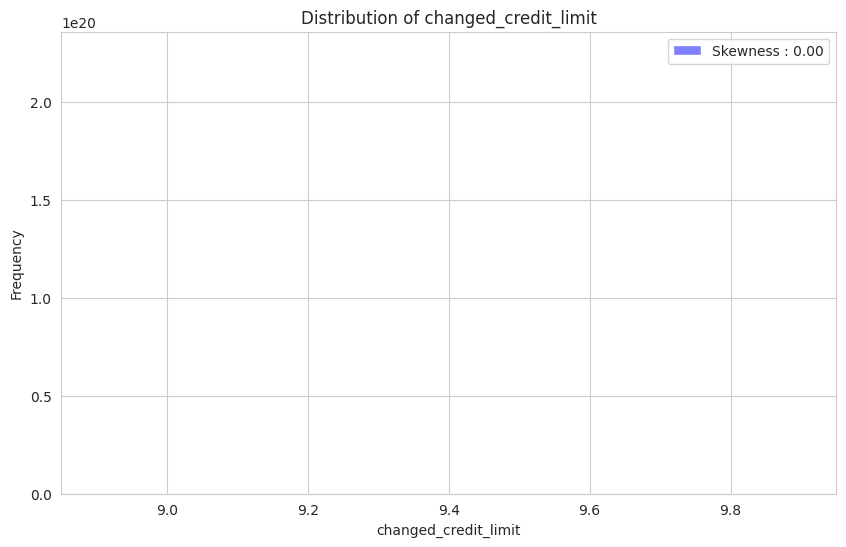

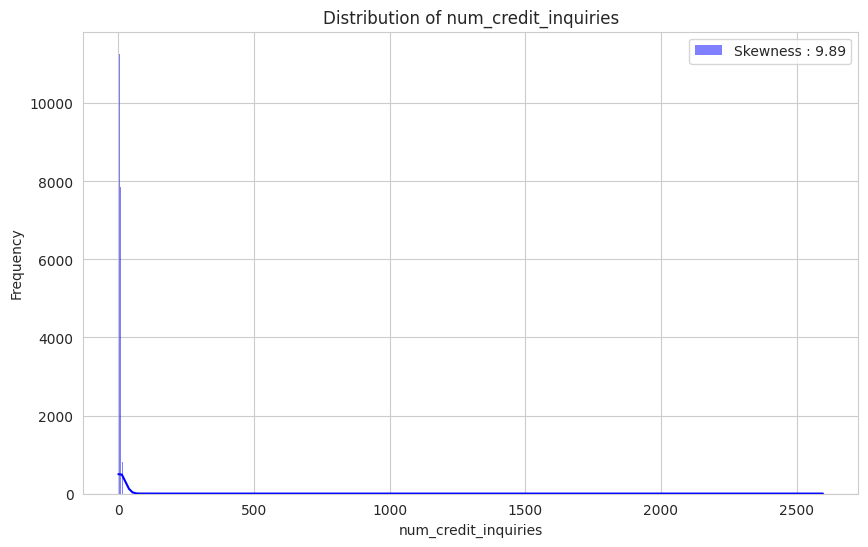

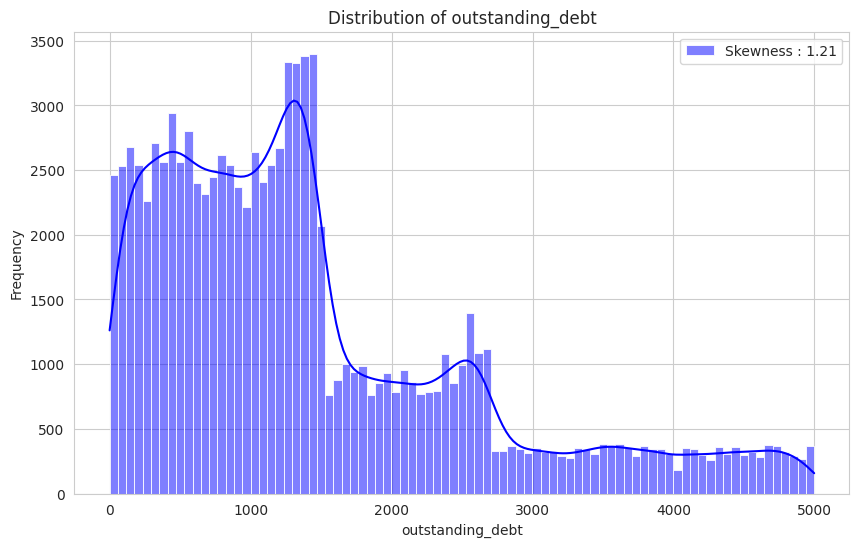

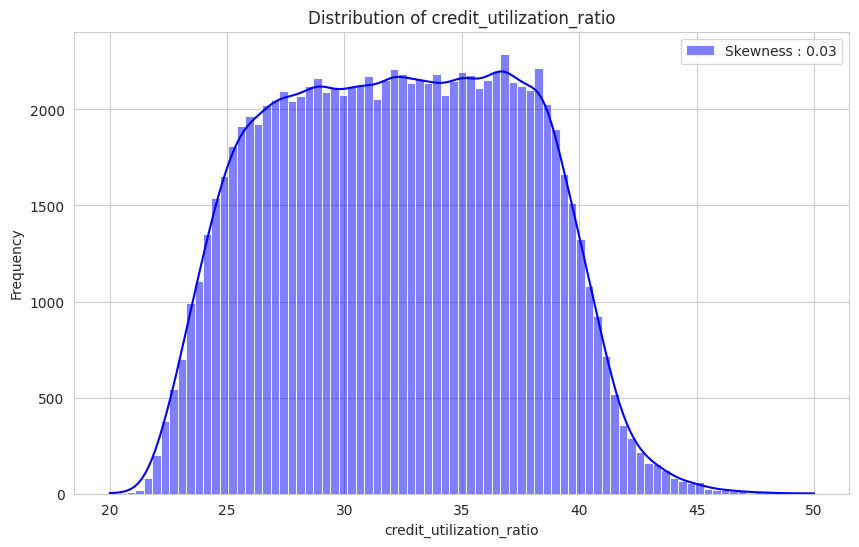

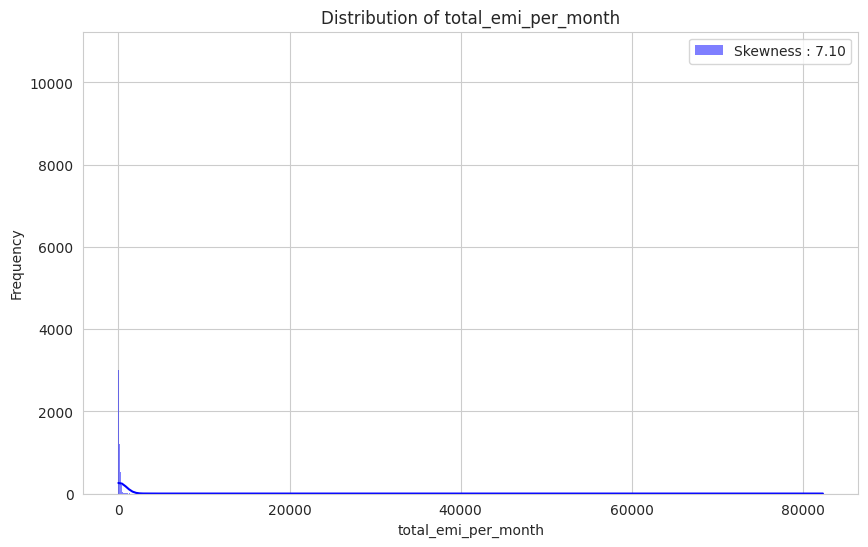

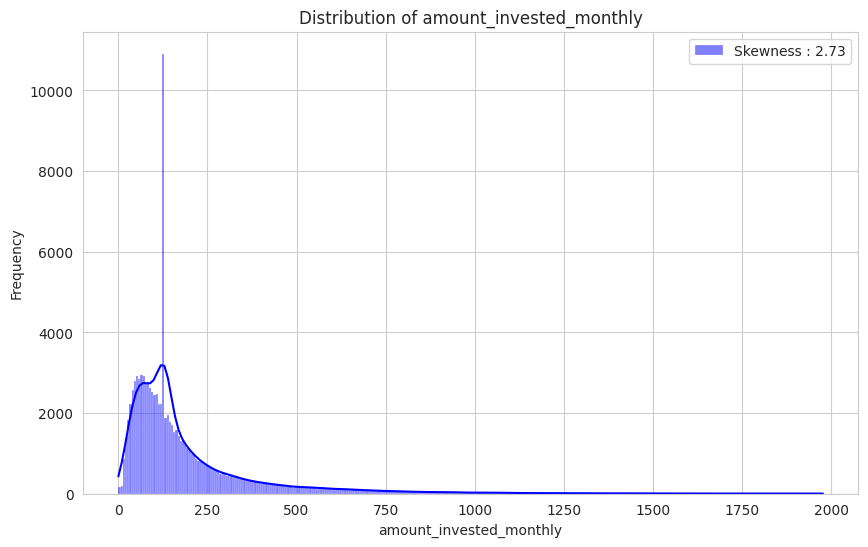

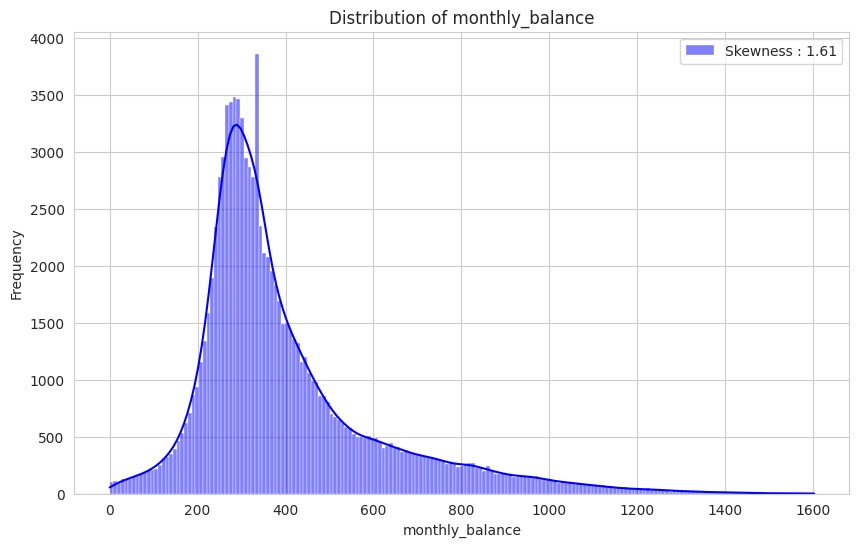

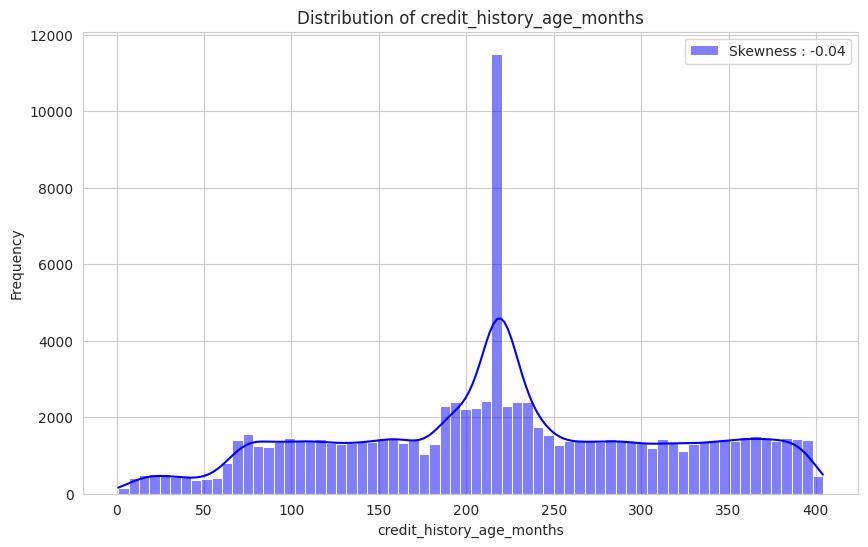

In [34]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="b", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [35]:
import plotly.express as px

def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'credit_score')
create_pie_chart_of_count(df, 'payment_behaviour')
create_pie_chart_of_count(df, 'occupation')

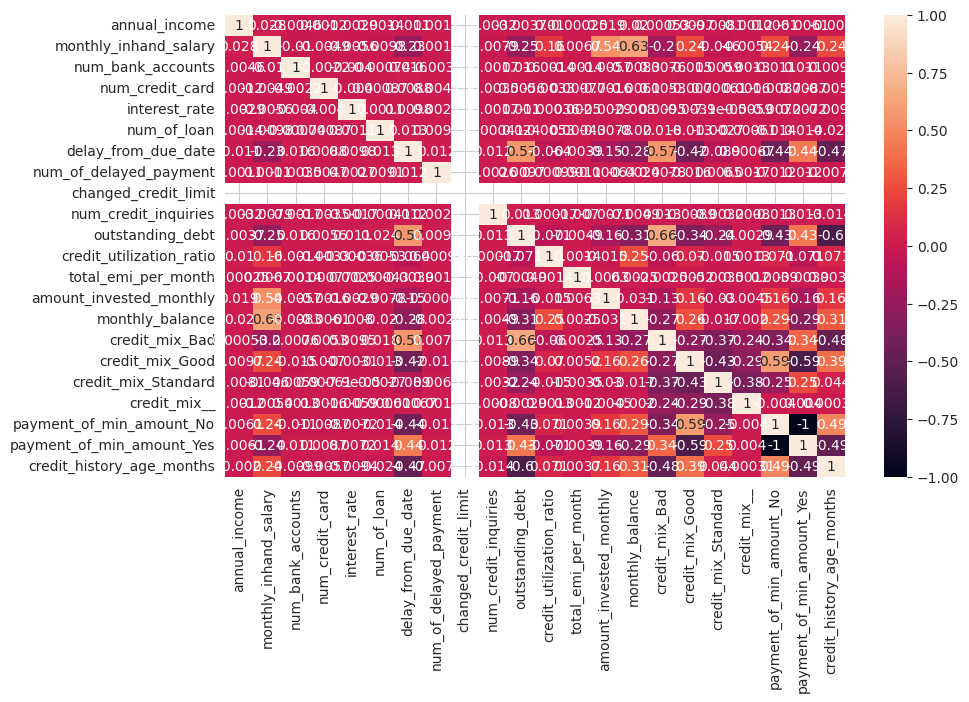

In [36]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [37]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_history_age_months
0,19114.120,1824.843,3,4,3,4,3,7.000,9.400,4.000,809.980,26.823,49.575,80.415,312.494,265.000
1,19114.120,3093.745,3,4,3,4,1,14.000,9.400,4.000,809.980,31.945,49.575,118.280,284.629,219.000
2,19114.120,3093.745,3,4,3,4,3,7.000,9.400,4.000,809.980,28.609,49.575,81.700,331.210,267.000
3,19114.120,3093.745,3,4,3,4,5,4.000,9.400,4.000,809.980,31.378,49.575,199.458,223.451,268.000
4,19114.120,1824.843,3,4,3,4,6,14.000,9.400,4.000,809.980,24.797,49.575,41.420,341.489,269.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.990,3359.416,4,6,7,2,23,7.000,9.400,3.000,502.380,34.664,35.104,60.971,479.866,378.000
99996,39628.990,3359.416,4,6,7,2,18,7.000,9.400,3.000,502.380,40.566,35.104,54.186,496.652,379.000
99997,39628.990,3359.416,4,6,5729,2,27,6.000,9.400,3.000,502.380,41.256,35.104,24.028,516.809,380.000
99998,39628.990,3359.416,4,6,7,2,20,14.000,9.400,3.000,502.380,33.638,35.104,251.673,319.165,381.000


In [38]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color


df_numeric.corr().style.applymap(color_correlation1)

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_history_age_months
annual_income,1.000000,0.028034,-0.004627,0.001250,-0.002908,0.001419,-0.010670,0.001092,nan,0.003152,-0.003706,0.010316,-0.000248,0.018601,0.019786,-0.002016
monthly_inhand_salary,0.028034,1.000000,-0.010318,-0.004857,-0.005573,-0.009796,-0.227504,0.001087,nan,-0.007925,-0.246268,0.158433,0.006692,0.542906,0.628933,0.238332
num_bank_accounts,-0.004627,-0.010318,1.000000,-0.002216,-0.003998,-0.000739,0.015919,-0.003505,nan,-0.001694,0.015548,-0.001365,-0.001433,-0.005695,-0.008301,-0.009924
num_credit_card,0.001250,-0.004857,-0.002216,1.000000,-0.004012,0.000867,0.008830,0.004700,nan,-0.003507,0.005626,-0.003341,0.000768,-0.001606,-0.006102,-0.005667
interest_rate,-0.002908,-0.005573,-0.003998,-0.004012,1.000000,0.001083,0.009822,0.002690,nan,-0.001667,0.010721,-0.000359,0.002517,-0.002910,-0.007994,-0.009413
num_of_loan,0.001419,-0.009796,-0.000739,0.000867,0.001083,1.000000,0.013051,0.009112,nan,-0.000413,0.024163,-0.005296,0.000428,-0.007848,-0.019607,-0.023734
delay_from_due_date,-0.010670,-0.227504,0.015919,0.008830,0.009822,0.013051,1.000000,0.012390,nan,0.011505,0.571988,-0.063872,-0.003925,-0.152963,-0.277323,-0.470044
num_of_delayed_payment,0.001092,0.001087,-0.003505,0.004700,0.002690,0.009112,0.012390,1.000000,nan,0.002580,0.009653,0.000989,0.001117,-0.000644,-0.002404,-0.007426
changed_credit_limit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
num_credit_inquiries,0.003152,-0.007925,-0.001694,-0.003507,-0.001667,-0.000413,0.011505,0.002580,nan,1.000000,0.013281,0.000169,-0.006968,-0.007115,-0.004919,-0.013603


In [39]:
#sns.pairplot(data=df, hue="credit_score")
#plt.show()

## Data Preprocessing

### Month

In [40]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}
df['Month'] = df['month'].map(months)

In [41]:
df.drop(columns='month', inplace=True)

In [42]:
df.head().T

,0,1,2,3,4
occupation,Scientist,Scientist,Scientist,Scientist,Scientist
annual_income,19114.120,19114.120,19114.120,19114.120,19114.120
monthly_inhand_salary,1824.843,3093.745,3093.745,3093.745,1824.843
num_bank_accounts,3,3,3,3,3
num_credit_card,4,4,4,4,4
interest_rate,3,3,3,3,3
num_of_loan,4,4,4,4,4
delay_from_due_date,3,1,3,5,6
num_of_delayed_payment,7.000,14.000,7.000,4.000,14.000
changed_credit_limit,9.400,9.400,9.400,9.400,9.400


### Occupation

In [43]:
df['occupation'].replace('________', 'Unknown', inplace=True)

less_frequent_occupations = ['Musician', 'Journalist'] # example categories to combine
df['occupation'] = df['occupation'].apply(lambda x: 'Other' if x in less_frequent_occupations else x)

df = pd.get_dummies(df, columns=['occupation'])

### Payment Behaviour

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
most_frequent = df['payment_behaviour'].mode()[0]
df['payment_behaviour'].fillna(most_frequent, inplace=True)

In [46]:
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['payment_behaviour']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['payment_behaviour']))
df = pd.concat([df.drop('payment_behaviour', axis=1), encoded_df], axis=1)

### Credit Score

In [47]:
df['credit_score'].value_counts()

credit_score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [48]:
class_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}
df['credit_score'] = df['credit_score'].map(class_mapping)

## Train - Test Split

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
X = df.drop('credit_score', axis=1)
y = df['credit_score'].values
seed = 61
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.20,
                                                    random_state=seed)

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ANN

### Modelling & Model Performance

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [54]:
from tensorflow.keras.optimizers import Adam

In [55]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [168]:
model = Sequential([
    Dense(512, activation="relu", input_shape=(44,)),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dense(16, activation="relu"),
    Dense(3, activation="softmax")
])

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [169]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=45,
                           restore_best_weights=True)

In [170]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.10,
          batch_size=64,
          epochs=300,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
1125/1125 [==============================] - 16s 12ms/step - loss: 0.7710 - accuracy: 0.6253 - val_loss: 0.7370 - val_accuracy: 0.6479
Epoch 2/300
1125/1125 [==============================] - 13s 12ms/step - loss: 0.7301 - accuracy: 0.6443 - val_loss: 0.7206 - val_accuracy: 0.6551
Epoch 3/300
1125/1125 [==============================] - 13s 12ms/step - loss: 0.7222 - accuracy: 0.6472 - val_loss: 0.7123 - val_accuracy: 0.6539
Epoch 4/300
1125/1125 [==============================] - 14s 12ms/step - loss: 0.7186 - accuracy: 0.6520 - val_loss: 0.7111 - val_accuracy: 0.6518
Epoch 5/300
1125/1125 [==============================] - 13s 12ms/step - loss: 0.7138 - accuracy: 0.6526 - val_loss: 0.7085 - val_accuracy: 0.6525
Epoch 6/300
1125/1125 [==============================] - 14s 12ms/step - loss: 0.7095 - accuracy: 0.6544 - val_loss: 0.7034 - val_accuracy: 0.6531
Epoch 7/300
1125/1125 [==============================] - 14s 12ms/step - loss: 0.7088 - accuracy: 0.6530 - val_loss: 0

In [171]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               23040     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                      

In [172]:
from sklearn.metrics import confusion_matrix, classification_report

In [173]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [174]:
eval_metric(model, X_train, y_train, X_test, y_test)

625/625 [==============================] - 2s 3ms/step
Test Set:
[[2053 1321  192]
 [1362 6901 2372]
 [ 464 1175 4160]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.55      3566
           1       0.73      0.65      0.69     10635
           2       0.62      0.72      0.66      5799

    accuracy                           0.66     20000
   macro avg       0.63      0.65      0.63     20000
weighted avg       0.66      0.66      0.66     20000


Train Set:
[[ 8380  5208   674]
 [ 5264 28037  9238]
 [ 1699  4504 16996]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57     14262
           1       0.74      0.66      0.70     42539
           2       0.63      0.73      0.68     23199

    accuracy                           0.67     80000
   macro avg       0.64      0.66      0.65     80000
weighted avg       0.68      0.67      0.67     80000



In [175]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_credit_score.keras')

In [176]:
from tensorflow.keras.models import load_model

In [177]:
model_credit_score = load_model('model_credit_score.keras')